In [90]:
import pandas as pd
import matplotlib.pyplot as plt

### Выгружаем данные 

In [91]:
visit_data = pd.read_csv('visits_info_short.csv')
order_data = pd.read_csv('orders_info_short.csv')
costs_data = pd.read_csv('costs_info_short.csv')

In [92]:
visit_data.shape, order_data.shape,costs_data.shape

((309901, 6), (40212, 3), (1800, 3))

### Описание данных 

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.


Структура orders_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.


Структура costs_info_short.csv:

* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

### Обзор данных 

In [93]:
visit_data['Session Start'] = pd.to_datetime(visit_data['Session Start'])
order_data['Event Dt'] = pd.to_datetime(order_data['Event Dt'])
costs_data['dt'] = pd.to_datetime(costs_data['dt'])

In [94]:
def wonch_info(name_df):
    print(name_df.head())
    print('_'*70)
    print(name_df.info())
    print('_'*70)
    print(name_df.describe())
    print('_'*70)

In [95]:
wonch_info(visit_data)

        User Id         Region   Device  Channel       Session Start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
______________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 n

In [96]:
wonch_info(order_data)

        User Id            Event Dt  Revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99
______________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
None
______________________________________________________________________
            User Id                       Event Dt       Revenue
count  4.021200e+04                          40212  40212.000000
mean   4.990295e+11  2019-08-18 21:31:11.158

In [97]:
wonch_info(costs_data)

          dt   Channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1
______________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB
None
______________________________________________________________________
                                  dt        costs
count                           1800  1800.000000
mean   2019-07-29 12:00:00.000000256    58.609611
min              2019-05-01 00:00:00     0.800000
25%              2019-06-14 18:00:00     6.495000
50%              201

У нас есть полные данные о 5 месяцах рекламных компаний (с 2019-05-01 до 2019-10-31 23:56:56)

### Oбщие затраты на привлечение пользоваетелей для разных каналов 

In [98]:
def deferent_channel(costs):
    costs['month'] = costs['dt'].dt.to_period('M')
    result = costs.groupby(['Channel', 'month'])['costs'].sum().reset_index()

    return result

In [99]:
cost_channel_month = deferent_channel(costs_data)

In [100]:
costs_in_dynamic = (
    cost_channel_month.pivot_table(
        index = 'month', # даты первых посещений
        columns='Channel',
        values = 'costs', # траты на рекламу # сумма трат
    )
)

<Axes: xlabel='month'>

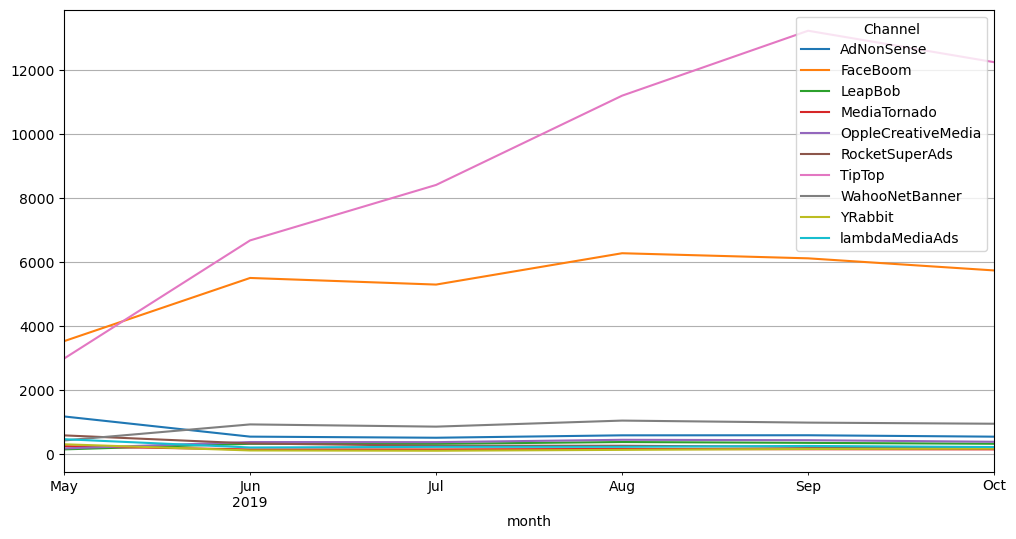

In [101]:
costs_in_dynamic.plot(figsize=(12, 6), grid=True)


In [102]:
cost_channel_month[(cost_channel_month['Channel'] == 'TipTop')], cost_channel_month[(cost_channel_month['Channel'] == 'FaceBoom')]

(   Channel    month    costs
 36  TipTop  2019-05   2981.0
 37  TipTop  2019-06   6675.6
 38  TipTop  2019-07   8410.2
 39  TipTop  2019-08  11202.0
 40  TipTop  2019-09  13232.5
 41  TipTop  2019-10  12250.0,
      Channel    month   costs
 6   FaceBoom  2019-05  3524.4
 7   FaceBoom  2019-06  5501.1
 8   FaceBoom  2019-07  5294.3
 9   FaceBoom  2019-08  6274.4
 10  FaceBoom  2019-09  6114.9
 11  FaceBoom  2019-10  5736.5)

Можно выделить основные каналы привлечения которые используюся чаще других. Это FaceBoom и TipTop.  
Видно, что за последние 5 месяцев затраты выросли:
* TipTop - на 9269
* FaceBoom - на 2212

Проверим насколько эффективны эти каналы привлечения, оправдвно ли увеличение затрат на FaceBoom, TipTop

### Первый источник перехода для каждого пользователя 

In [103]:
def first_visit(visit):
    first_session = visit.groupby('User Id')['Session Start'].min().reset_index()
    result = visit.merge(first_session, 
                        on=['User Id', 'Session Start'],
                        how='inner')
    return result

In [133]:
first_session = first_visit(visit_data)
first_session['month'] = first_session['Session Start'].dt.to_period('M')
first_session.head(3)

,User Id,Region,Device,Channel,Session Start,Session End,month
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,2019-05
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,2019-05
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,2019-05


In [109]:
start_in_dinamic = first_session.pivot_table(
    index='month',
    columns='Channel',
    values='User Id',
    aggfunc='count'
)
start_in_dinamic

Channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
month,,,,,,,,,,,
2019-05,1138,3187,695,1052,697,1052,2196,725,1066,608,14695
2019-06,532,4926,1486,632,1481,653,3213,1539,581,272,7808
2019-07,508,4754,1494,643,1457,604,3173,1401,603,304,7686
2019-08,582,5642,1757,689,1756,715,3720,1717,650,317,9041
2019-09,579,5487,1635,686,1707,722,3802,1625,714,346,9024
2019-10,541,5148,1486,662,1507,702,3457,1546,698,302,8185


<Axes: xlabel='month'>

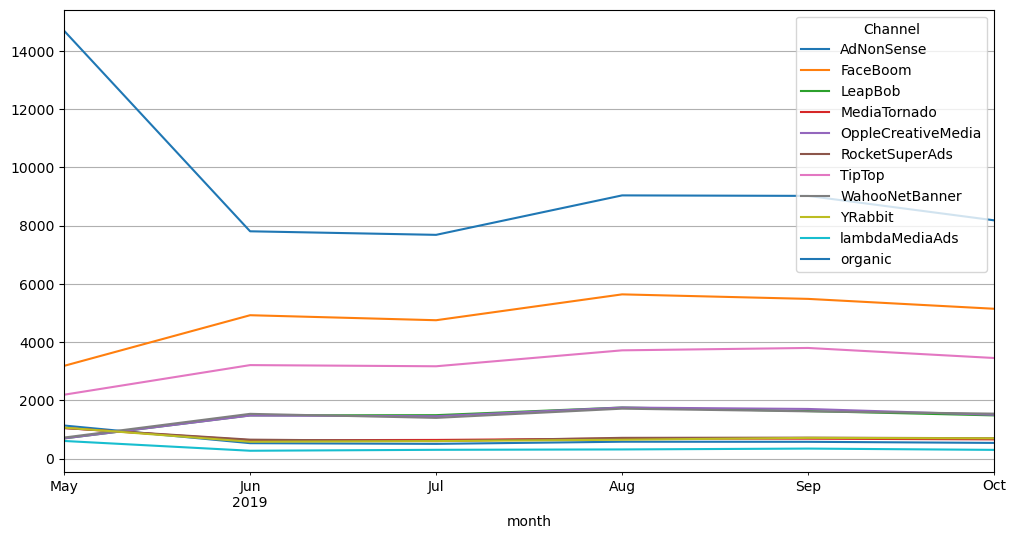

In [108]:
start_in_dinamic.plot(figsize=(12,6), grid=True)

Из прошлого графика мы выяснили, что затраты на маркетинг в TipTop и FaceBoom выросли. Однако это не увеличило количество пользователей, пришедших из этих канклов.  
Можно заметить, что большинстро пользователей продолжают приходить органическим путем 

<Axes: xlabel='Channel'>

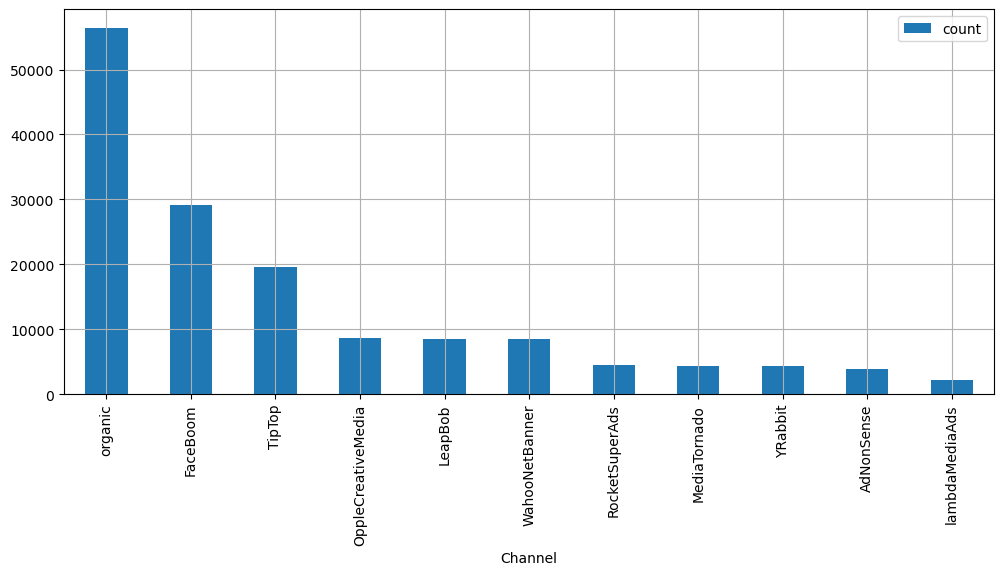

In [131]:
graf = start_in_dinamic.sum().reset_index(name='count').sort_values('count', ascending=False)
graf.plot(kind='bar', figsize=(12, 5), x='Channel', grid=True)

Среди не органических каналов привлечения самыми популярными являются FaceBoom и TipTop  
Именно в эти каналы маркетинг и вкладывает больше всего денег  
Нужно проверить окупается ли это влажение и посчитать метрики для каждого канала привлечения

### Метрики LTV, CAC, ROI

in process... 